In [253]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [254]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


100번째 까지만 2진분류

In [255]:
DF1 = irisDF.iloc[:]
DF1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [256]:
featureDF = DF1[DF1.columns[:-1]]
targetDF = (DF1.species == 'setosa')

In [257]:
targetDF

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [258]:
print(f'featureDF: {featureDF.shape}, targetDF: {targetDF.shape}')

featureDF: (150, 4), targetDF: (150,)


데이터셋 분리

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=16, stratify=targetDF)

스케일링

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

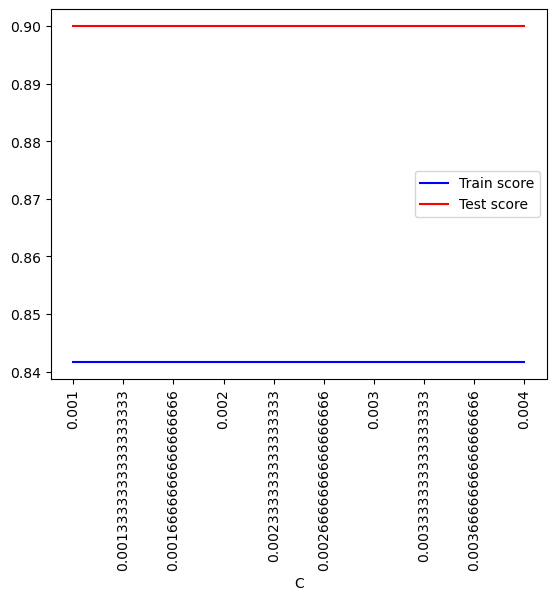

In [261]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

test_score_list, train_score_list,pred_list = [],[], []
for k in np.linspace(0.0018,0.004,10):
    svc = SVC(gamma='auto',max_iter=10000, kernel='linear',C=k,random_state=17)
    svc.fit(scaled_X_train, y_train)
    train_score=svc.score(scaled_X_train, y_train)
    test_score=svc.score(scaled_X_test, y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    
    y_pred = svc.predict(scaled_X_test)
    pred_list.append(y_pred)
    
plt.plot(train_score_list, 'b-',label='Train score')
plt.plot(test_score_list, 'r-',label='Test score')
plt.xticks(range(10),np.linspace(0.001,0.004,10),rotation='vertical')
# plt.xscale('log')
plt.xlabel('C')
plt.legend(loc='best')
plt.show()

In [262]:
cross_validate(svc, scaled_X_train, y_train)

{'fit_time': array([0.00200105, 0.00200009, 0.00100136, 0.00199914, 0.00100136]),
 'score_time': array([0.00099874, 0.00099969, 0.00099969, 0.00099945, 0.00099754]),
 'test_score': array([0.83333333, 0.79166667, 0.95833333, 0.91666667, 0.875     ])}

In [263]:


cross_val_score(svc, scaled_X_train, y_train)

array([0.83333333, 0.79166667, 0.95833333, 0.91666667, 0.875     ])

In [264]:
svc = SVC(gamma='auto',kernel='linear', C=0.003, max_iter=10000, random_state=17,probability=True)
svc.fit(scaled_X_train, y_train)
score=svc.score(scaled_X_test, y_test)
print(f'test score: {score}')
score=svc.score(scaled_X_train, y_train)
print(f'train score: {score}')
y_pred = svc.predict(scaled_X_test)

test score: 0.9
train score: 0.8416666666666667


In [265]:
cross_val_score(svc, scaled_X_test, y_test)

array([0.66666667, 1.        , 0.83333333, 0.83333333, 0.83333333])

In [266]:
cross_validate(svc, scaled_X_train, y_train, cv=3)

{'fit_time': array([0.00300455, 0.0030005 , 0.00335217]),
 'score_time': array([0.00199866, 0.00099945, 0.00143838]),
 'test_score': array([0.65 , 0.65 , 0.575])}

In [267]:
scaled_X_test[0]

array([-1.23300888, -0.08316652, -1.34397289, -1.1819095 ])

In [268]:
new_data = scaler.transform([[4.1,3.1,1.1,0.1]])

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [269]:
svc.predict(new_data)

array([0], dtype=int64)

In [270]:
svc.decision_function(new_data)

array([[ 2.21130558,  0.99893341, -0.21116201]])

In [271]:
svc.predict_proba(new_data)

array([[0.89932815, 0.07974816, 0.02092369]])

In [ ]:
t_data = scaler.transform()

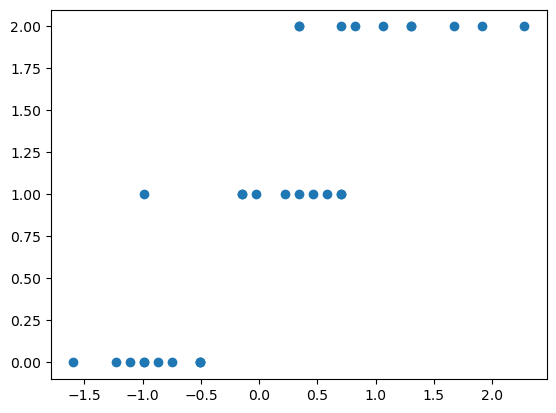

In [273]:
colors=['orange' if idx>=50 else 'blue' for idx in range(scaled_X_test.shape[0])]
plt.scatter(scaled_X_test[:,0], y_test[:])
plt.show()